## Analysing data

출처는 kaggle 사이트를 참고하여 직접 실습을 따라해보았습니다.
(https://www.kaggle.com/devprabal/bmi-prediction-of-health-status)

(1) 데이터 불러오기 및 결측치 확인

In [1]:
!pip install --upgrade scikit-learn==0.22.1

In [2]:
import numpy as np
import pandas as pd

import os
print(os.listdir("./"))

['guru', '500_Person_Gender_Height_Weight_Index.csv', '스크린샷 2021-07-27 오후 9.17.39.png', '.DS_Store', 'Develop', '6일차 과제.mov', 'TextDetection', '.localized', '화면 기록 2021-07-23 오후 4.25.46.mov', '공모전', '11.CoreML_DetectionTextSpam', 'hye-min', 'GoogleService-Info.plist', 'project_login_1', '화면 기록 2021-07-24 오전 2.15.05.mov', '스크린샷 2021-07-27 오후 7.18.21.png', '스크린샷 2021-07-27 오후 8.28.38.png', 'Health_Recommend.ipynb', '화면 기록 2021-07-23 오후 11.07.17.mov', '.ipynb_checkpoints', '.git', '처음부터 시작하는 딥러닝 유치원', '로고 및 공모전 파일', '스크린샷 2021-07-18 오후 9.14.38.png', '스크린샷 2021-07-27 오후 9.17.37.png']


In [3]:
data = pd.read_csv('./500_Person_Gender_Height_Weight_Index.csv')
data_visual = pd.read_csv('./500_Person_Gender_Height_Weight_Index.csv')

In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.shape

(500, 4)

In [6]:
# 결측치 확인

data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool



(2) Visualization and Plotting libraries

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [8]:
sns.__version__

'0.11.1'

(3) Adding additional columns to DataFrame as per need

In [9]:
def convert_status_to_description(x):
    if x['Index'] == 0 :
        return 'Extremely Weak'
    elif x['Index'] == 1 :
        return 'Weak'
    elif x['Index'] == 2 :
        return 'Normal'
    elif x['Index'] == 3 :
        return 'Overweight'
    elif x['Index'] == 4 :
        return 'Obesity'
    elif x['Index'] == 5 :
        return 'Extreme Obesity'
    

In [10]:
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [11]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male' :
        return 1
    elif x['Gender'] == 'Female' :
        return 0
    
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label, axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


(4) Scatter plot showing different categories for all points in data

In [12]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

/Users/hyemzzzy/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


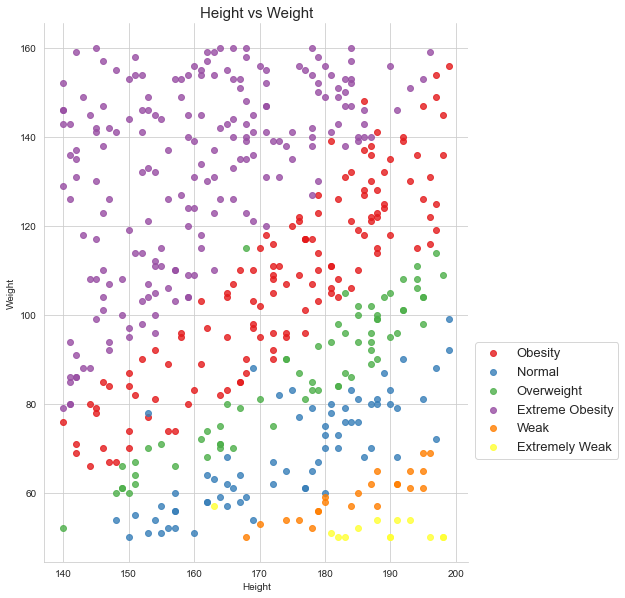

In [13]:
sns.lmplot(x = 'Height',  y = 'Weight', data = data_visual,
          fit_reg = False,
          hue = 'Status',
          legend = False,
          palette = 'Set1',
          size = 8,
          aspect = 1)

ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)


# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.3), prop={'size':13})


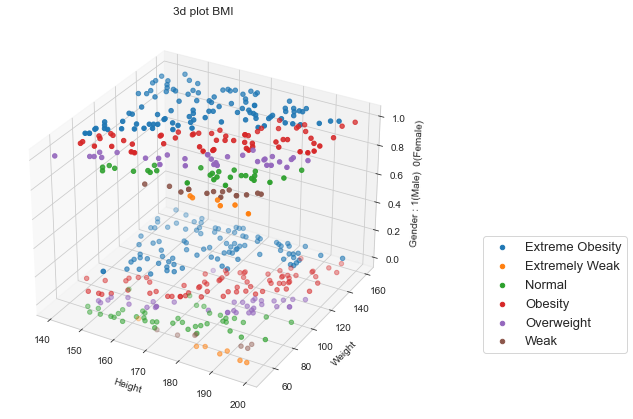

In [14]:
# 3-D Scatter plot to differentiate b/w male and female

groups = data_visual.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)') #z축을 중심으로 성별이 나누어졌음
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.3), prop={'size': 13})
plt.show()

(5) Counting people based on Gender, Health status, etc.

In [15]:
people = data_visual['Gender'].value_counts() 

print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [16]:
categories = data_visual['Status'].value_counts() 
categories

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

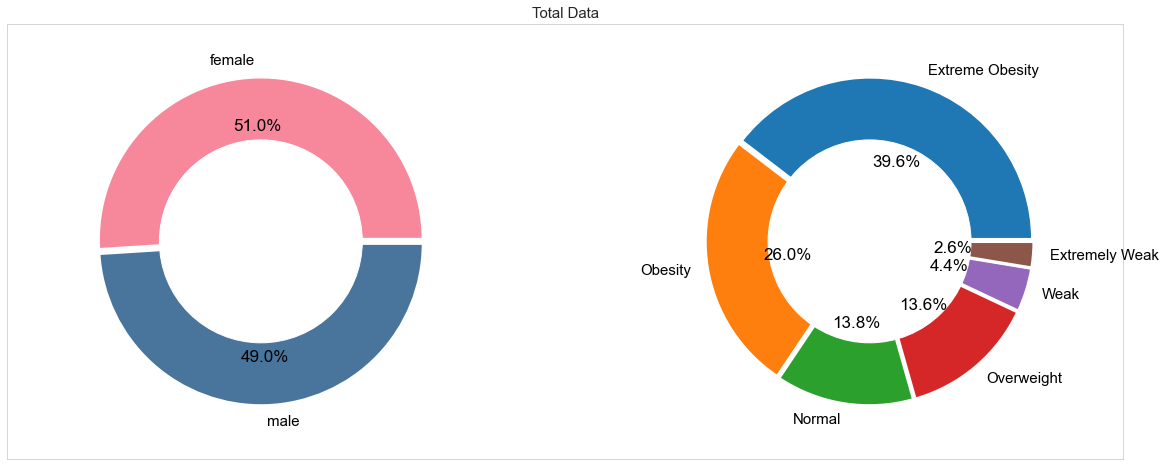

In [17]:
# Doughnut plot (pie-plot) representing features (Gender, Health Status) for all people

fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [56]:
data_visual_male = data_visual[data_visual['Index']==1]
data_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
27,Male,187,62,1,Weak,1
31,Male,178,52,1,Weak,1
32,Female,195,65,1,Weak,0
51,Female,176,54,1,Weak,0
98,Male,195,69,1,Weak,1


In [19]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [20]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [21]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: Status, dtype: int64

Text(0, 0, 'Male')

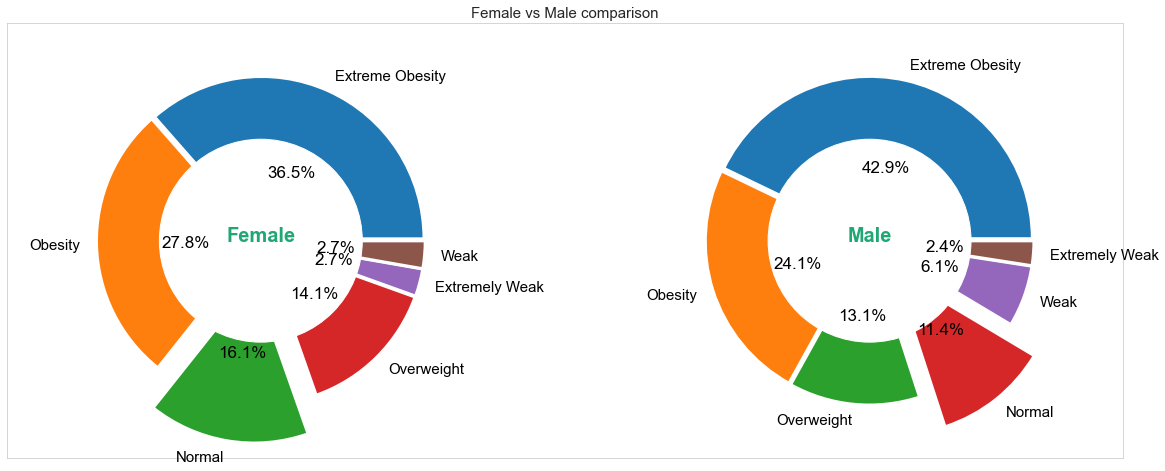

In [22]:
# Doughnut plot (pie-plot) representing Health Status for Female and Male

fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.2,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.2,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

## Machine Learning

(1) Importing libraries and Encoding categorical values

In [23]:
# https://www.programmersought.com/article/14565313808/ <- categorical new version


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

print(data)
# Gender
ct = ColumnTransformer([("Gender", OneHotEncoder(), [0])], remainder ='passthrough')
data = ct.fit_transform(data)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [24]:
data = data[:,1:]
data

array([[  1., 174.,  96.,   4.],
       [  1., 189.,  87.,   2.],
       [  0., 185., 110.,   4.],
       ...,
       [  0., 141., 136.,   5.],
       [  1., 150.,  95.,   5.],
       [  1., 173., 131.,   5.]])

In [25]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3
0,1.0,174.0,96.0,4.0
1,1.0,189.0,87.0,2.0
2,0.0,185.0,110.0,4.0
3,0.0,195.0,104.0,3.0
4,1.0,149.0,61.0,3.0


(2) Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,:-1] = std_sc.fit_transform(df.iloc[:,:-1])

In [27]:
df.head()

,0,1,2,3
0,1.020204,0.247939,-0.309117,4.0
1,1.020204,1.164872,-0.587322,2.0
2,-0.980196,0.920357,0.123647,4.0
3,-0.980196,1.531645,-0.061823,3.0
4,1.020204,-1.280283,-1.391027,3.0


(3) Splitting data into training and testing sets

In [28]:
X = df.iloc[:,:-1] # 마지막 index 제외한 나머지 컬럼 (gender, column_gender, Height, Weight)
y = df.iloc[:,-1] # 마지막 index 컬럼

In [29]:
# train : test = 0.8 / 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)


In [30]:
print(type(X_train))
X_train.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2
107,1.020204,-0.668995,1.483762
336,-0.980196,-0.179963,1.452850
71,1.020204,0.492454,0.340029
474,-0.980196,-0.179963,-0.834616
6,1.020204,-1.402541,-0.432764


(4) Ensemble Learning (Random Forest Classification)

In [54]:
from sklearn.ensemble import RandomForestClassifier
import pickle 
from sklearn.externals import joblib

rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

(5) Prediciting results

In [55]:
y_pred_rfc = rfc.predict(X_test)

(6) Accuracy measurements

In [33]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 2,  1,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0,  1, 12,  2,  0],
       [ 0,  0,  1,  0, 29,  2],
       [ 0,  0,  0,  0,  1, 35]])

In [34]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

91.0

(7) Calculation of optimal number of trees in Random Forest

In [35]:
def trees_in_forest_vs_acc(trees, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [36]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000] #파라미터 값 조정
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.9, 0.91, 0.91, 0.91, 0.9, 0.91]

Text(0, 0.5, 'Accuracy scores for Random Forest Classification')

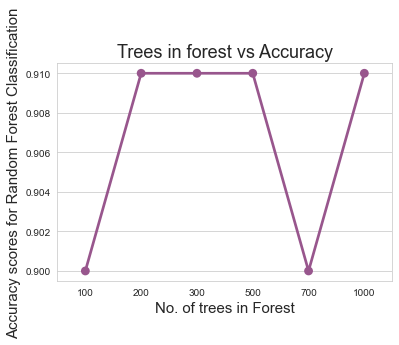

In [37]:
# Visualisation of No. of Trees and their corresponding Accracy scores

tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


 #Input gender as Male/Female, height in cm, weight in Kgtree_vs_acc.head()

In [38]:
 #Input gender as Male/Female, height in cm, weight in Kg
from sklearn.preprocessing import StandardScaler   
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

def health_test(gender, height, weight):
    individual_data_dict = {'Gender':gender, 'Height':height, 'Weight':weight}   
    individual_data = pd.DataFrame(data = individual_data_dict, index=[0])
    ct = ColumnTransformer([('Gender', OneHotEncoder(), [0])], remainder ='passthrough')
    individual_data = ct.fit_transform(individual_data)
    df = pd.DataFrame(individual_data)
    df.iloc[:,:] = std_sc.transform(df.iloc[:,:])
    y_pred = rfc.predict(individual_data)
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'
    

In [47]:
sample_person = ['Female',175,90]
sample_result = health_test(*sample_person)
sample_result  

'Overweight'